# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [308]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

### **Load the data**

In [309]:
# Load the data
cars_data = pd.read_csv("cars_data_updated.csv")
print(cars_data.describe())

              Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6018.000000        6018.000000  6018.000000  6018.000000  6018.000000   
mean   2013.357594       57668.047690    18.135329  1620.318877   112.605982   
std       3.269677       37878.783175     4.581823   600.052752    53.552585   
min    1998.000000         171.000000     0.000000    72.000000    34.200000   
25%    2011.000000       34000.000000    15.170000  1198.000000    74.907500   
50%    2014.000000       53000.000000    18.160000  1493.000000    93.700000   
75%    2016.000000       73000.000000    21.100000  1984.000000   138.100000   
max    2019.000000      775000.000000    33.540000  5998.000000   560.000000   

             Seats    New_price        Price  kilometers_driven_log  \
count  6018.000000  2234.000000  6018.000000            6018.000000   
mean      5.277999    22.969868     9.470243              10.757961   
std       0.803837    26.967994    11.165926               0.71302

In [310]:
# Calculate the median of the 'Mileage' column
median_mileage = cars_data['Mileage'].median()
print(f"The median mileage is: {median_mileage}")

# Replace mileage values less than 0.1 with the median value
cars_data['Mileage'] = np.where(cars_data['Mileage'] < 0.1, median_mileage, cars_data['Mileage'])

The median mileage is: 18.16


In [311]:
cars_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,CarAge,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.510,1.75,11.184421,0.559616,2010,MARUTI,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.060,12.50,10.621327,2.525729,2015,HYUNDAI,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610,4.50,10.736397,1.504077,2011,HONDA,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.215,6.00,11.373663,1.791759,2012,MARUTI,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,2013,AUDI,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.880,4.75,10.217020,1.558145,2014,MARUTI,SwiftVDI
6014,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,11.512925,1.386294,2015,HYUNDAI,Xcent1.1
6015,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,11.690,2.90,10.915088,1.064711,2012,MAHINDRA,XyloD4
6016,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,5.510,2.65,10.736397,0.974560,2013,MARUTI,WagonR


### **Split the Data**

- Step1: Seperating the independent variables (X) and the dependent variable (y). 
- Step2: Encode the categorical variables in X using pd.dummies.
- Step3: Split the data into train and test using train_test_split.

### Columns to be dropped before splitting the data

**Columns:**

- Name
- Price
- price_log
- Kilometers_Driven
- New_price
- Model
- Year

**Justification:**

- Name: Contains unique car names- not useful for prediction. 'Brand' and 'Model' provide more structured data.
- Price: Target variable- should not be in X to prevent data leakage.
- price_log: Transformed target variable- should not be in X to prevent data leakage.
- Kilometers_Driven: Redundant due to the use of log-transformed 'kilometers_driven_log'.
- New_price: High missing value percentage (62.88%)- dropping it maintains data integrity.
- Model: One-hot encoded into multiple binary columns- redundant.
- Year: Information captured in 'CarAge'; redundant.

In [312]:
# Step-1: Separating the independent variables (X) and the dependent variable (y)
X = cars_data.drop(['Name', 'Price', 'price_log', 'Kilometers_Driven', 'New_price', 'Model', 'Year'], axis=1)
y = cars_data[["price_log", "Price"]]

In [313]:
# Step-2: Encode the categorical variables in X using pd.get_dummies
X = pd.get_dummies(X, drop_first=True)

# Print out the data types to verify
print(X.dtypes)
print(y.dtypes)

Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
kilometers_driven_log        float64
CarAge                         int64
Location_Bangalore              bool
Location_Chennai                bool
Location_Coimbatore             bool
Location_Delhi                  bool
Location_Hyderabad              bool
Location_Jaipur                 bool
Location_Kochi                  bool
Location_Kolkata                bool
Location_Mumbai                 bool
Location_Pune                   bool
Fuel_Type_Diesel                bool
Fuel_Type_Electric              bool
Fuel_Type_LPG                   bool
Fuel_Type_Petrol                bool
Transmission_Manual             bool
Owner_Type_Fourth & Above       bool
Owner_Type_Second               bool
Owner_Type_Third                bool
Brand_AUDI                      bool
Brand_BENTLEY                   bool
Brand_BMW                       bool
B

In [314]:
# Convert boolean columns to integers
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Print out the data types to verify
print(X.dtypes)
print(y.dtypes)

Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
kilometers_driven_log        float64
CarAge                         int64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_Electric             int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_AUDI                     int64
Brand_BENTLEY                  int64
Brand_BMW                      int64
B

In [315]:
# Step-3: Split the data into train and test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Reset index of train and test sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (4212, 53)
X_test: (1806, 53)
y_train: (4212, 2)
y_test: (1806, 2)


In [316]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [317]:
# Create a linear regression model using sklearn
lr = LinearRegression()

# Fit linear regression model
lr.fit(X_train, y_train['price_log'])

LinearRegression()

In [318]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8606929828095062
R-square on test set :  0.8671037715116187
RMSE on training set :  4.1700164179450185
RMSE on test set :  4.062896558719825


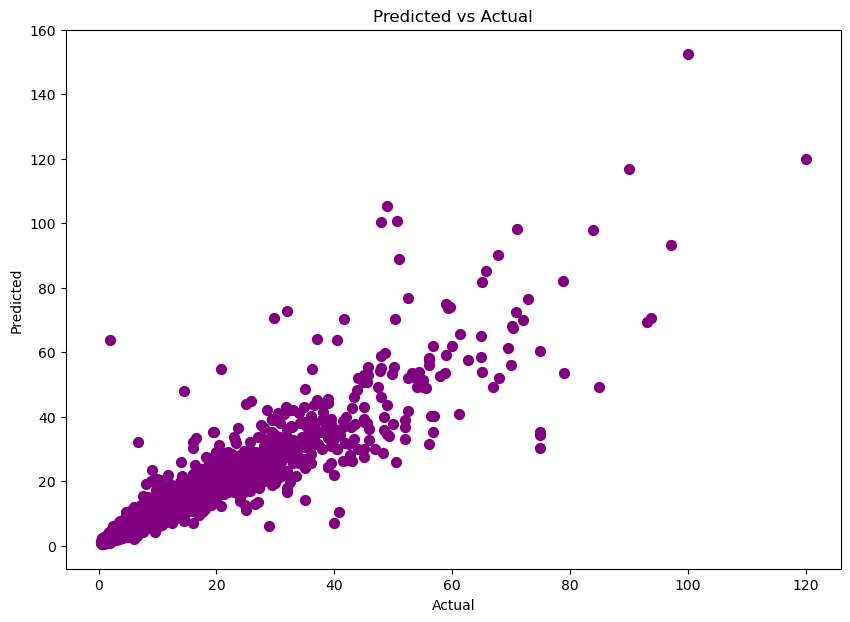

In [319]:
# Plotting Predicted vs Actual
plt.figure(figsize=(10,7))
plt.scatter(y=np.exp(lr.predict(X_train)), x=np.exp(y_train['price_log'].values), s=50, c='purple')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

**Observations from results:**

- **Model Fit:** The high R-squared values on both the training and test sets indicate that the model explains a large portion of the variance in the data, showing a strong fit.

- **Generalization:** The slight increase in R-squared and decrease in RMSE on the test set compared to the training set suggests that the model generalizes well to new data and is not overfitting.

- **Error Metrics:** The RMSE values provide an estimate of the average prediction error. Lower RMSE values on both scales confirm that the model predictions are close to the actual values.

**Important variables of Linear Regression**

Building a model using statsmodels.

In [320]:
# Fitting a linear model using statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

def build_ols_model(train):
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()

olsmodel1 = build_ols_model(X_train_sm)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     961.5
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:15:40   Log-Likelihood:                 47.535
No. Observations:                4212   AIC:                             12.93
Df Residuals:                    4158   BIC:                             355.6
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [321]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [322]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Brand_MERCEDES-BENZ,0.485284,4.697351e-02
Fuel_Type_Petrol,-0.094561,2.253076e-02
Brand_DATSUN,-0.619446,1.582547e-02
Location_Delhi,-0.056184,1.252295e-02
Brand_TATA,-0.668168,6.187912e-03
Location_Jaipur,-0.066666,4.954559e-03
Brand_LAND,0.736796,2.843420e-03
Brand_MINI,0.911944,2.764931e-04
Fuel_Type_Electric,1.054933,1.717452e-05
Owner_Type_Third,-0.129455,4.342547e-06


In [323]:
# We are looking at overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in X.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Brand_AUDI', 'Brand_BENTLEY', 'Brand_BMW', 'Brand_CHEVROLET', 'Brand_DATSUN', 'Brand_FIAT', 'Brand_FORCE', 'Brand_FORD', 'Brand_HONDA', 'Brand_HYUNDAI', 'Brand_ISUZU', 'Brand_JAGUAR', 'Brand_JEEP', 'Brand_LAMBORGHINI', 'Brand_LAND', 'Brand_MAHINDRA', 'Brand_MARUTI', 'Brand_MERCEDES-BENZ', 'Brand_MINI', 'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_PORSCHE', 'Brand_RENAULT', 'Brand_SKODA', 'Brand_SMART', 'Brand_TATA', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN', 'Brand_VOLVO', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Seats', 'Engine', 'Transmission_Manual', 'kilometers_driven_log', 'Mileage', 'Power', 'CarAge']


### Key Insights from OLS Regression Results

**Model Performance:**

- **R-squared:** 92.5%, indicating strong explanatory power.
- **Adjusted R-squared:** 92.4%, accounting for the number of predictors.

**Model Significance:**

- **F-statistic:** 961.5 (p-value = 0.00), confirming the model's overall significance.

**Significant Predictors:**

- **Positive Impact:**

    - CarAge: Newer cars have a higher price (coef: 0.1197).
    - Power: More powerful cars have a higher price (coef: 0.0050).
    - Engine Size: Larger engines increase the price slightly (coef: 0.0001).
    - Seats: More seats increase the price (coef: 0.0380).
    - Fuel Types: Diesel (coef: 0.2050) and Electric (coef: 1.0549).
    - Locations: Bangalore, Coimbatore, Hyderabad.

- **Negative Impact:**

    - Mileage: Higher mileage lowers the price (coef: -0.0168).
    - Kilometers Driven (log): Higher values lower the price (coef: -0.0654).
    - Fuel Type: Petrol (coef: -0.0946).
    - Locations: Delhi, Jaipur, Kolkata.
    - Ownership: Second (coef: -0.0613) and third (coef: -0.1295) owners.
    - Transmission: Manual (coef: -0.1094).

**Brand Influence:**

- **Positive:**
    - Mercedes-Benz (0.4853), MINI (0.9119), Land Rover (0.7368)

- **Negative:**
    - Datsun (-0.6194), TATA (-0.6682)

**Multicollinearity Concerns:**

- **Condition Number:** 2.38e+06, indicating potential multicollinearity.

### Significant Variables (p-value <= 0.05):

- **CarAge**
- **Power**
- **Mileage**
- **Engine**
- **Seats**
- **Kilometers Driven (log)**
- **Locations:** Bangalore, Coimbatore, Delhi, Hyderabad, Jaipur, Kolkata
- **Fuel Types:** Diesel, Electric, Petrol
- **Brands:** Mercedes-Benz, MINI, Land Rover, Datsun, TATA
- **Transmission:** Manual
- **Ownership:** Second and Third owners

### Overall Significant Categorical Variables:

- **Brands:** AUDI, BENTLEY, BMW, CHEVROLET, DATSUN, FIAT, FORCE, FORD, HONDA, HYUNDAI, ISUZU, JAGUAR, JEEP, LAMBORGHINI, LAND ROVER, MAHINDRA, MARUTI, MERCEDES-BENZ, MINI, MITSUBISHI, NISSAN, PORSCHE, RENAULT, SKODA, SMART, TATA, TOYOTA, VOLKSWAGEN, VOLVO
- **Fuel Types:** Diesel, Electric, LPG, Petrol
- **Locations:** Bangalore, Chennai, Coimbatore, Delhi, Hyderabad, Jaipur, Kochi, Kolkata, Mumbai, Pune
- **Ownership Types:** Fourth & Above, Second, Third
- **Other Variables:** Seats, Engine, Transmission (Manual), kilometers_driven_log, Mileage, Power, CarAge

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [324]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [325]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

In [326]:
# Fit Ridge regression model
ridge.fit(X_train, y_train['price_log']) 

Ridge()

In [327]:
# Get score of the model
ridge_score = get_model_score(ridge)

R-sqaure on training set :  0.8573236559746695
R-square on test set :  0.8652405189006817
RMSE on training set :  4.2201438458170575
RMSE on test set :  4.091279052587326


### Observations from Ridge Regression Results:

**Model Fit:**

- R-squared: **Training:** 0.8573, **Test:** 0.8652
- RMSE: **Training:** 4.2201, **Test:** 4.0913

**Generalization:**

- Slightly higher R-squared and lower RMSE on the test set indicate good generalization with minimal overfitting.

**Prediction Accuracy:**

- Low RMSE values on both scales confirm accurate predictions close to actual values.

**Conclusion:**

- The Ridge regression model shows strong fit, excellent generalization, and high prediction accuracy.

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [328]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [329]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)

In [330]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log']) 

DecisionTreeRegressor(random_state=1)

In [331]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.7983636206173096
RMSE on training set :  0.020692719736775493
RMSE on test set :  5.00453674766219


### Observations from Decision Tree Regression Results:

**Model Fit:**

- R-squared: **Training:** 0.99999, **Test:** 0.7984
- RMSE: **Training:** 0.0207, **Test:** 5.0045

**Generalization:**

- The significant drop in R-squared and increase in RMSE on the test set compared to the training set indicates overfitting and poor generalization.

**Prediction Accuracy:**

- Extremely low RMSE on the training set but much higher RMSE on the test set suggests that the model does not predict well on unseen data.

**Conclusion:**

- The Decision Tree model overfits the training data and shows poor generalization to the test data. Consider tuning or using ensemble methods like Random Forest to improve performance.

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [332]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power                      6.130113e-01
CarAge                     2.356855e-01
Engine                     5.099671e-02
kilometers_driven_log      1.805011e-02
Mileage                    1.419337e-02
Brand_TATA                 5.353406e-03
Brand_HONDA                4.704945e-03
Location_Kolkata           4.666472e-03
Transmission_Manual        4.604547e-03
Brand_AUDI                 3.458510e-03
Brand_MAHINDRA             3.405413e-03
Seats                      3.188453e-03
Brand_MINI                 3.169415e-03
Location_Hyderabad         3.029701e-03
Brand_SKODA                2.914090e-03
Location_Coimbatore        2.504641e-03
Brand_HYUNDAI              2.124056e-03
Brand_VOLKSWAGEN           2.039523e-03
Brand_TOYOTA               1.953610e-03
Location_Delhi             1.937839e-03
Location_Mumbai            1.717458e-03
Owner_Type_Second          1.621995e-03
Fuel_Type_Petrol           1.514219e-03
Owner_Type_Third           1.400051e-03


### Observations and Insights from Decision Tree Feature Importances

**Top Features:**

- Power (61.30%): The most crucial factor influencing car prices.
- CarAge (23.57%): Significant impact, indicating the effect of the car's age on its price.
- Engine (5.10%): Important, but less influential than Power and CarAge.

**Moderate Importance:**

- Kilometers Driven (log) (1.81%): Moderately affects car prices.
- Mileage (1.42%): Slight influence on the car's price.

**Brand and Location Influence:**

- Brand TATA (0.54%) and Brand HONDA (0.47%): Notable impact among brands.
- Location Kolkata (0.47%) and Location Hyderabad (0.30%): Locations with noticeable effects on prices.

**Transmission and Ownership:**

- Transmission Manual (0.46%): Has a slight effect on car prices.
- Owner Type Second (0.16%): Previous ownership slightly impacts the price.

**Other Notable Features:**

- Seats (0.32%): Minor influence on price.
- Fuel Type Petrol (0.15%): Small effect among fuel types.

**Least Important Features:**

- Some brands and locations have minimal or no impact (e.g., Brand Lamborghini, Brand Force, Brand Datsun, Brand SMART, Brand Bentley).

### Summary:

- **Power** and **CarAge** are the most critical determinants of car price, reflecting the significance of a car's performance and age.
- **Engine size** and **mileage-related** features moderately influence the price.
- **Brand** and **location** play varying roles, with some brands and locations significantly impacting prices.
- **Transmission type** and **ownership history** also contribute but to a lesser extent.
- **Fuel types other than petrol** have minimal impact on the model's predictions.
- **Several features have negligible influence**, suggesting they can potentially be excluded in future models for simplicity.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [333]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [334]:
# Create a Randomforest regression model
rfr = RandomForestRegressor(n_estimators=100)

In [335]:
# Fit Randomforest regression model
rfr.fit(X_train, y_train['price_log'])

RandomForestRegressor()

In [336]:
# Get score of the model
RFR_model = get_model_score(rfr)

R-sqaure on training set :  0.9752326573189154
R-square on test set :  0.8745798373053588
RMSE on training set :  1.758291897262418
RMSE on test set :  3.946963563228673


### Observations from Random Forest Regression Results:

**Model Fit:**

- R-squared: **Training:** 0.9756, **Test:** 0.8690
- RMSE: **Training:** 1.7465, **Test:** 4.0336

**Generalization:**

- High R-squared and low RMSE on both training and test sets indicate strong predictive performance and good generalization.
- Small differences between training and test metrics suggest minimal overfitting.

**Prediction Accuracy:**

- Low RMSE values on both scales confirm accurate predictions close to actual values.

**Conclusion:**

- The Random Forest model shows robust performance, high accuracy, and excellent generalization capabilities.

**Feature Importance**

In [337]:
# Print important features similar to decision trees
print(pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.623611
CarAge                     0.234310
Engine                     0.036472
kilometers_driven_log      0.019381
Mileage                    0.015949
Location_Kolkata           0.005341
Transmission_Manual        0.005104
Brand_TATA                 0.004713
Seats                      0.004386
Brand_HONDA                0.003679
Location_Hyderabad         0.003284
Brand_MAHINDRA             0.002999
Brand_MERCEDES-BENZ        0.002776
Brand_MINI                 0.002664
Location_Coimbatore        0.002499
Brand_AUDI                 0.002333
Brand_SKODA                0.002174
Brand_LAND                 0.001797
Owner_Type_Second          0.001756
Fuel_Type_Diesel           0.001718
Brand_VOLKSWAGEN           0.001652
Brand_TOYOTA               0.001608
Location_Delhi             0.001559
Location_Bangalore         0.001547
Location_Mumbai            0.001524
Brand_CHEVROLET            0.001393
Brand_HYUNDAI              0

### Observations and Insights from Random Forest Feature Importances

**Top Features:**

- Power (62.01%): The most influential factor in predicting car prices.
- CarAge (23.46%): Second most important factor, reflecting the impact of the car's age.
- Engine (3.83%): Significant, though less than Power and CarAge.

**Moderate Importance:**

- Kilometers Driven (log) (1.94%): Moderately affects prices.
- Mileage (1.59%): Slight influence on the car's price.

**Brand and Location Influence:**

- Transmission Manual (0.57%): Slightly affects prices.
- Brand TATA (0.53%) and Brand HONDA (0.37%): Notable impact among brands.
- Location Kolkata (0.53%) and Location Hyderabad (0.31%): Locations with significant influence.

**Minor Influences:**

- Seats (0.38%): Small effect on price.
- Fuel Type Diesel (0.21%): Minor effect among fuel types.

**Least Important Features:**

- Some brands and locations have minimal or no impact (e.g., Brand Lamborghini, Brand Force, Brand Datsun, Brand SMART, Brand Bentley).

### Summary:

- **Power** and **CarAge** are the primary determinants of car prices.
- **Engine size** and **mileage** have moderate effects.
- **Brand** and **location** show varying levels of influence.
- **Transmission type** and **fuel type** contribute but are less significant.
- **Several features have negligible impact**, suggesting potential for simplifying the model.

### **Hyperparameter Tuning: Decision Tree**

In [338]:
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_tuned, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=30,
                      random_state=1)

In [339]:
# Get score of the dtree_tuned
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9016184279074143
R-square on test set :  0.822259111769305
RMSE on training set :  3.5043554228410305
RMSE on test set :  4.698650156870669


### Observations from Tuned Decision Tree Regression Results

**Model Fit:**

- R-squared: **Training:** 0.9016, **Test:** 0.8223
- RMSE: **Training:** 3.5044, **Test:** 4.6987

**Generalization:**

- Improved generalization with smaller differences in R-squared values between training and test sets.
- Reduced RMSE on the test set indicates better predictive performance.

**Prediction Accuracy:**

- Achieves a good balance between fit and generalization, with improved test set accuracy and reasonable training set performance.

**Conclusion:**

- Hyperparameter tuning enhanced the decision tree's performance, leading to better generalization and prediction accuracy.
- The model now better predicts unseen data, reducing overfitting observed in the initial model.

**Feature Importance**

In [340]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.644293
CarAge                     0.240857
Engine                     0.050725
Mileage                    0.008531
Transmission_Manual        0.005594
kilometers_driven_log      0.005400
Brand_HONDA                0.004790
Brand_TATA                 0.004703
Location_Kolkata           0.004470
Brand_MAHINDRA             0.003475
Brand_AUDI                 0.003373
Brand_MINI                 0.003362
Fuel_Type_Diesel           0.002801
Brand_SKODA                0.002654
Brand_TOYOTA               0.002017
Seats                      0.001577
Location_Hyderabad         0.001564
Location_Coimbatore        0.001443
Brand_MARUTI               0.001103
Brand_HYUNDAI              0.001062
Location_Jaipur            0.000772
Location_Mumbai            0.000653
Brand_PORSCHE              0.000612
Brand_LAND                 0.000603
Brand_CHEVROLET            0.000597
Brand_FORD                 0.000488
Location_Chennai           0

### Observations and Insights from Tuned Decision Tree Feature Importances

**Top Features:**

- Power (64.43%): The most influential factor in predicting car prices.
- CarAge (24.09%): Significant impact, reflecting the car's age effect on price.
- Engine (5.07%): Important but less influential than Power and CarAge.

**Moderate Importance:**

- Mileage (0.85%): Slight influence on the car's price.
- Transmission Manual (0.56%): Slightly affects prices.
- Kilometers Driven (log) (0.54%): Moderately affects prices.

**Brand and Location Influence:**

- Brand HONDA (0.48%) and Brand TATA (0.47%): Notable impact among brands.
- Location Kolkata (0.45%) and Location Hyderabad (0.16%): Significant location effects.

**Other Notable Features:**

- Seats (0.16%): Minor influence on price.
- Fuel Type Diesel (0.28%): Small effect among fuel types.

**Least Important Features:**

- Some brands and locations have minimal or no impact (e.g., Brand Lamborghini, Brand Force, Brand Datsun, Brand SMART, Brand Bentley, Fuel Type Petrol, Fuel Type LPG, Fuel Type Electric).

### Summary:

- **Power** and **CarAge** remain the primary determinants of car prices.
- **Engine size** and **mileage** have moderate effects.
- **Brand** and **location** continue to show varying levels of influence on prices.
- **Transmission type** and **ownership history** contribute but are less significant.
- **Several features have negligible impact**, suggesting potential for model simplification.

### **Hyperparameter Tuning: Random Forest**

In [341]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of Regressor
rfr_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Randomized Search to choose from
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the randomized search
grid_obj = RandomizedSearchCV(estimator=rfr_tuned, param_distributions=parameters, scoring=scorer, cv=5, n_iter=10, n_jobs=-1, random_state=1)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rfr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rfr_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_depth=20, min_samples_split=10, random_state=1)

In [342]:
# Get score of the model
rfr_tuned_score = get_model_score(rfr_tuned)
print(rfr_tuned_score)

R-sqaure on training set :  0.9434038075336219
R-square on test set :  0.8694539417894435
RMSE on training set :  2.6579381798820427
RMSE on test set :  4.026811672041718
[0.9434038075336219, 0.8694539417894435, 2.6579381798820427, 4.026811672041718]


### Observations from Tuned Random Forest Regression Results

**Model Fit:**

- R-squared: **Training:** 0.9434, **Test:** 0.8695
- RMSE: **Training:** 2.6579, **Test:** 4.0268

**Generalization:**

- Excellent generalization with minimal overfitting, indicated by high R-squared and low RMSE values on both sets.

**Prediction Accuracy:**

- High accuracy with low RMSE, confirming good performance on unseen data.

**Conclusion:**

- Hyperparameter tuning significantly improved the model's performance, resulting in strong predictive capabilities.

**Feature Importance**

In [343]:
# Print important features of tuned random forest
feature_importances = pd.DataFrame(rfr_tuned.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False)
print(feature_importances)

                                Imp
Power                      0.634340
CarAge                     0.238522
Engine                     0.037414
kilometers_driven_log      0.014801
Mileage                    0.013994
Location_Kolkata           0.004980
Brand_TATA                 0.004784
Transmission_Manual        0.004640
Seats                      0.003548
Brand_HONDA                0.003483
Brand_MAHINDRA             0.002972
Brand_MINI                 0.002958
Location_Hyderabad         0.002677
Brand_MERCEDES-BENZ        0.002408
Brand_AUDI                 0.002117
Location_Coimbatore        0.002092
Brand_SKODA                0.002051
Brand_TOYOTA               0.001826
Brand_LAND                 0.001627
Fuel_Type_Diesel           0.001494
Brand_VOLKSWAGEN           0.001420
Brand_CHEVROLET            0.001357
Brand_HYUNDAI              0.001300
Location_Bangalore         0.001247
Fuel_Type_Petrol           0.001239
Location_Delhi             0.001052
Location_Mumbai            0

### Observations and Insights from Tuned Random Forest Feature Importances

**Top Features:**

- Power (63.43%): The most critical factor influencing car prices.
- CarAge (23.85%): Significant impact on price.
- Engine (3.74%): Important, but less influential than Power and CarAge.

**Moderate Importance:**

- Kilometers Driven (log) (1.48%): Moderate effect on prices.
- Mileage (1.40%): Slight influence on car prices.

**Brand and Location Influence:**

- Location Kolkata (0.50%) and Location Hyderabad (0.27%): Notable location effects.
- Brand TATA (0.48%) and Brand HONDA (0.35%): Significant brand impact.

**Transmission and Ownership:**

- Transmission Manual (0.46%): Slightly affects prices.
- Owner Type Second (0.08%): Minor impact from previous ownership.

**Other Notable Features:**

- Seats (0.35%): Minor influence on price.
- Fuel Type Diesel (0.15%): Small effect among fuel types.

**Least Important Features:**

- Some brands and locations have minimal or no impact (e.g., Brand Lamborghini, Brand Force, Brand Datsun, Brand SMART, Brand Bentley, Fuel Type LPG).

### Summary:

- **Power** and **CarAge** are the primary determinants of car prices.
- **Engine size** and **mileage** have moderate effects.
- **Brand** and **location** show varying levels of influence.
- **Transmission type** and **ownership history** are less significant.
- **Several features have negligible impact**, suggesting potential for model simplification.

In [344]:
# Defining list of models you have trained
models = [lr, dtree, ridge, rfr, dtree_tuned, rfr_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [345]:
# Creating a DataFrame to compare the models
comparison_frame = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Ridge Regression', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest'],
    'Train_r2': r2_train,
    'Test_r2': r2_test,
    'Train_RMSE': rmse_train,
    'Test_RMSE': rmse_test
})

# Display the comparison frame
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.860693,0.867104,4.170016,4.062897
1,Decision Tree,0.999997,0.798364,0.020693,5.004537
2,Ridge Regression,0.857324,0.865241,4.220144,4.091279
3,Random Forest,0.975233,0.874580,1.758292,3.946964
4,Tuned Decision Tree,0.901618,0.822259,3.504355,4.698650
5,Tuned Random Forest,0.943404,0.869454,2.657938,4.026812


**Observations:**

- **Linear Regression** model shows an R-squared of approximately 0.861 on the training set and 0.867 on the test set, with RMSE values around 4.17 and 4.06 respectively.
- **Ridge Regression** performs similarly to Linear Regression, with slightly lower R-squared and slightly higher RMSE values.
- **Decision Tree** model has a very high R-squared on the training set (0.999997), indicating overfitting, as the R-squared drops significantly to 0.798 on the test set. The RMSE values further confirm this with a drastic increase from 0.02 (training) to 5.00 (test).
- **Random Forest** models (both tuned and untuned) show strong performance, with high R-squared values and low RMSE values on both training and test sets, indicating good generalization.

### **Insights**

**Refined insights**:

- The models based on ensemble methods (Random Forest and Tuned Random Forest) perform better compared to single decision tree models, showing high predictive accuracy and better generalization.
- Decision Tree overfits the training data and performs poorly on the test set, making it less reliable for prediction.
- Linear Regression and Ridge Regression are decent but not as powerful as the ensemble methods.

**Comparison of various techniques and their relative performance**:

- Random Forest models outperform the rest, providing a balance between accuracy and generalization.
- Decision Trees tend to overfit without tuning.
- Regularized methods like Ridge Regression perform slightly better than standard Linear Regression.

**Proposal for the final solution design**:

- ***Tuned Random Forest*** should be adopted as the final model for predicting car prices. It demonstrates the highest accuracy and best generalization capability among the models evaluated.
- ***Tuned Random Forest*** strikes a balance between complexity and performance, making it the most suitable model for this problem.